In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle

In [113]:
#load dataset
dataset = pd.read_csv("cannabisGrowthRaw2020.csv")

In [114]:
dataset.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,good


In [115]:
dataset.groupby('Utility').median()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
Utility,,,,,,,,,
average,2548.0,12.880,8.220,62.5,3.0,3.0,3.00,3.0,3.0
best,2136.0,18.840,12.290,81.0,4.0,3.0,3.95,4.0,3.0
good,2441.0,18.080,11.000,71.5,4.0,3.0,3.00,3.5,3.0
low,1644.5,8.345,6.365,75.0,2.3,2.5,3.00,3.0,3.0
none,2551.0,10.855,7.000,27.0,2.0,2.0,3.00,3.0,3.0


In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PMCno     1458 non-null   float64
 1   DBH       1470 non-null   float64
 2   Ht        1470 non-null   float64
 3   Surv      1284 non-null   float64
 4   Vig       1334 non-null   float64
 5   Ins_res   1334 non-null   float64
 6   Stem_Fm   1334 non-null   float64
 7   Crown_Fm  1334 non-null   float64
 8   Brnch_Fm  1334 non-null   float64
 9   Utility   1472 non-null   object 
dtypes: float64(9), object(1)
memory usage: 115.1+ KB


In [117]:
dataset.describe()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
count,1458.000000,1470.000000,1470.000000,1284.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,2136.977366,75.865518,9.674565,62.059579,3.159520,2.966417,3.083208,3.282159,2.905547
std,648.661372,1614.500903,4.297192,32.247227,1.041356,0.838065,0.760061,0.778459,0.811572
min,1.000000,0.580000,1.000000,1.500000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1595.000000,8.600000,6.145000,38.000000,2.500000,2.500000,3.000000,3.000000,2.500000
50%,2426.000000,15.000000,9.285000,66.000000,3.000000,3.000000,3.000000,3.300000,3.000000
75%,2656.000000,21.982500,12.300000,88.000000,4.000000,3.500000,3.700000,4.000000,3.300000
max,3537.000000,45452.000000,24.000000,108.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PMCno     1458 non-null   float64
 1   DBH       1470 non-null   float64
 2   Ht        1470 non-null   float64
 3   Surv      1284 non-null   float64
 4   Vig       1334 non-null   float64
 5   Ins_res   1334 non-null   float64
 6   Stem_Fm   1334 non-null   float64
 7   Crown_Fm  1334 non-null   float64
 8   Brnch_Fm  1334 non-null   float64
 9   Utility   1472 non-null   object 
dtypes: float64(9), object(1)
memory usage: 115.1+ KB


In [119]:
dataset.isnull().sum()

PMCno        14
DBH           2
Ht            2
Surv        188
Vig         138
Ins_res     138
Stem_Fm     138
Crown_Fm    138
Brnch_Fm    138
Utility       0
dtype: int64

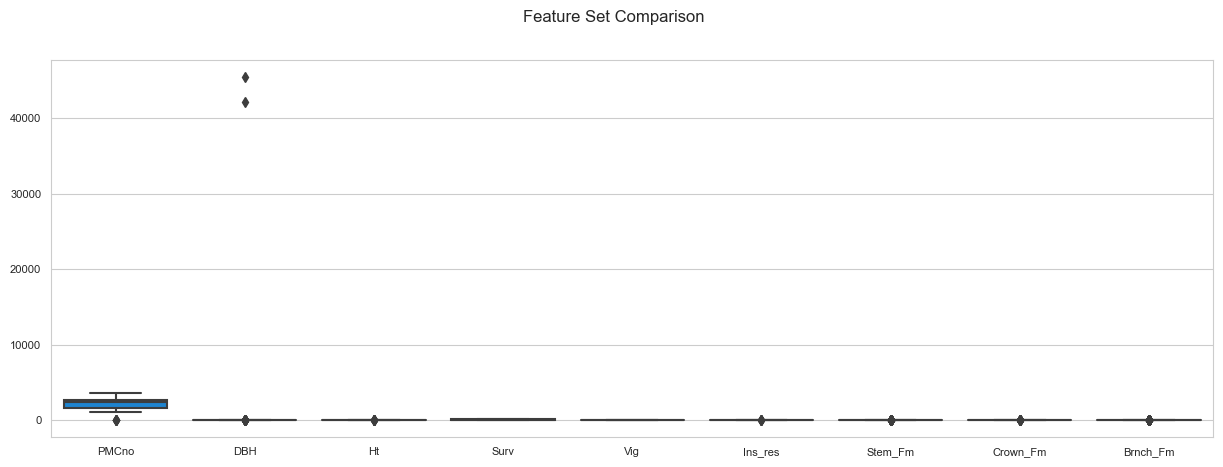

In [120]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

In [121]:
#Using Mapping
dataset['Utility_new'] = dataset['Utility'].map( {'low':0, 'good':1, 'average':1, 'best':2})
dataset = dataset.drop('Utility', axis = 1)

In [122]:
dataset.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility_new
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,1.0
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,2.0
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,0.0
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,1.0
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,1.0


In [123]:
dataset.fillna(dataset.median(), inplace = True)
print(dataset.isnull().sum())

PMCno          0
DBH            0
Ht             0
Surv           0
Vig            0
Ins_res        0
Stem_Fm        0
Crown_Fm       0
Brnch_Fm       0
Utility_new    0
dtype: int64


In [124]:
dataset['Utility_new'].unique()

array([1., 2., 0.])

In [125]:
Q1 = dataset.DBH.quantile(0.25)
Q3 = dataset.DBH.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [126]:
dataset = dataset[(dataset.DBH>lower_limit)&(dataset.DBH<upper_limit)]

In [127]:
Q1 = dataset.PMCno.quantile(0.25)
Q3 = dataset.PMCno.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [128]:
dataset = dataset[(dataset.PMCno>lower_limit)&(dataset.PMCno<upper_limit)]

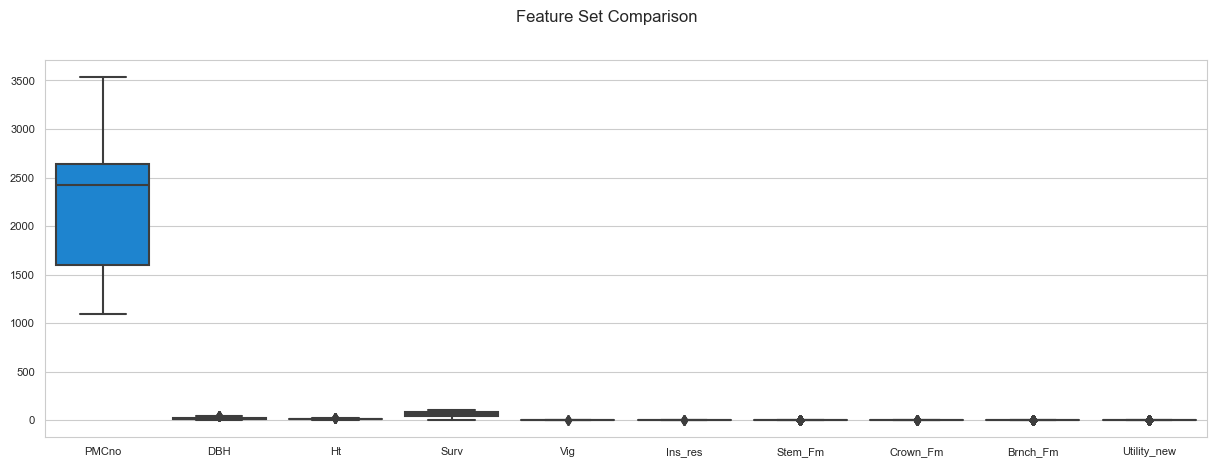

In [129]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset)
plt.show()

In [130]:
#SWEETVIZ Repot
import sweetviz as sv
dataset_report = sv.analyze(dataset)
dataset_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


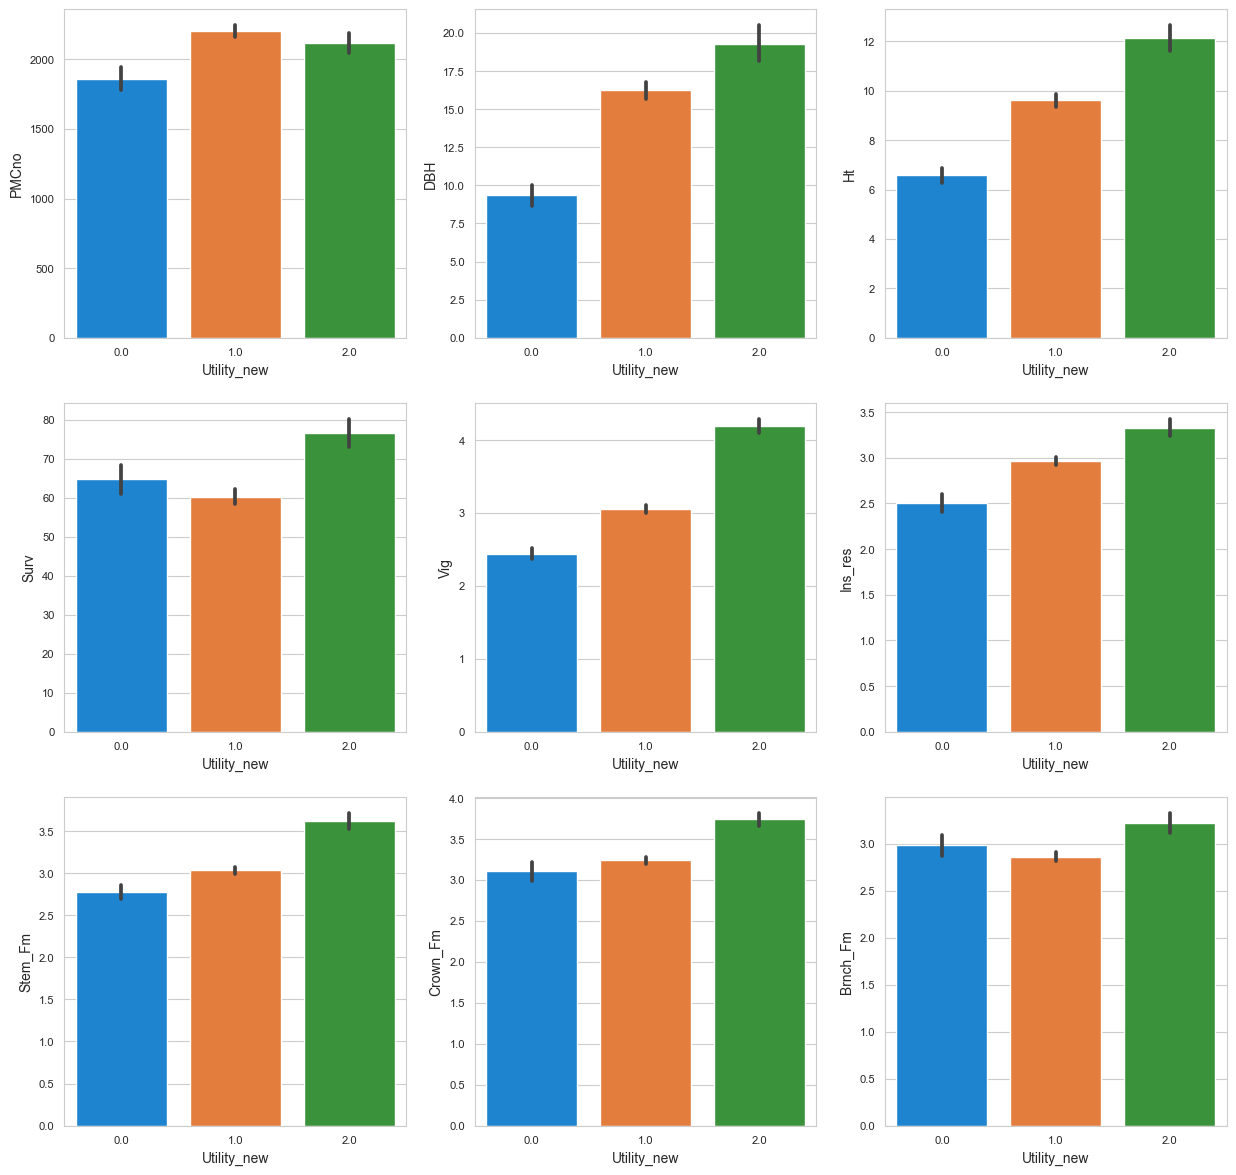

In [131]:
#Histrogram for each class
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['PMCno','DBH','Ht','Surv','Vig','Ins_res','Stem_Fm','Crown_Fm','Brnch_Fm']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.barplot(data = dataset, x = 'Utility_new', y = col)
    cnt+=1
plt.show()

<AxesSubplot:>

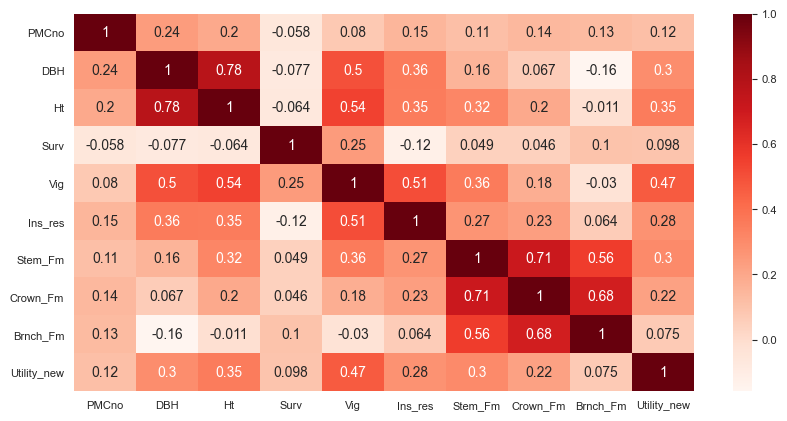

In [132]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Reds")

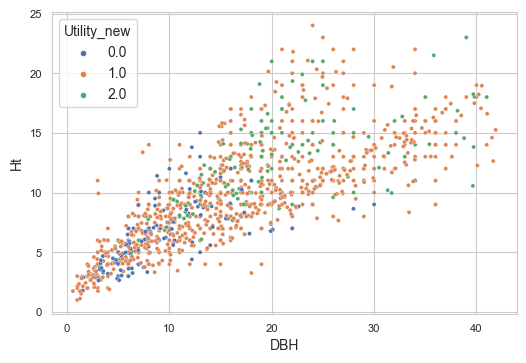

In [133]:
#Scatter plote of Ht vs DBH
plt.figure(figsize=(6,4))
sns.scatterplot(x='DBH',y='Ht',data=dataset,hue='Utility_new',palette="deep")
plt.show()

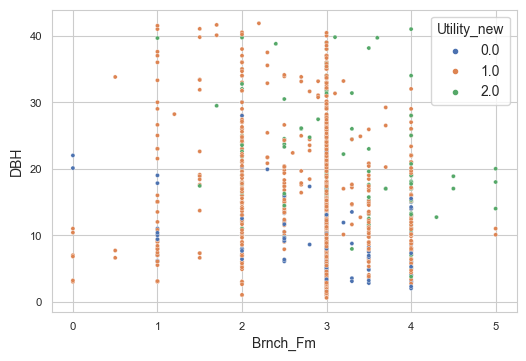

In [134]:
#Scatter plote of DBH vs Brnch_Fm
plt.figure(figsize=(6,4))
sns.scatterplot(x='Brnch_Fm',y='DBH',data=dataset,hue='Utility_new',palette="deep")
plt.show()

In [135]:
dataset['Utility_new'].value_counts()

1.0    1026
0.0     212
2.0     191
Name: Utility_new, dtype: int64

In [136]:
X = dataset.drop('Utility_new', axis = 1)
Y = dataset['Utility_new']

In [137]:
X.shape

(1429, 9)

In [138]:
Y.shape

(1429,)

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [140]:
counter = Counter(Y_train)
print("Before SMOTE:" , counter)

smt = SMOTE()
X_train_s, Y_train_s = smt.fit_resample(X_train, Y_train)

counter_s = Counter(Y_train_s)
print("Before SMOTE:" , counter_s)

Before SMOTE: Counter({1.0: 707, 0.0: 148, 2.0: 145})
Before SMOTE: Counter({1.0: 707, 0.0: 707, 2.0: 707})


In [141]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [142]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

In [143]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('rf_classifier',RandomForestClassifier())])

In [144]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [145]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [146]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_s, Y_train_s)

In [147]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,Y_test)))
    

Logistic Regression Test Accuracy: 0.627039627039627
Decision Tree Test Accuracy: 0.8065268065268065
RandomForest Test Accuracy: 0.8391608391608392


In [149]:
for i,model in enumerate(pipelines):
    if model.score(X_test,Y_test)>best_accuracy:
        best_accuracy=model.score(X_test,Y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


In [156]:
Y_pred=best_pipeline.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76        64
         1.0       0.90      0.88      0.89       319
         2.0       0.58      0.65      0.61        46

    accuracy                           0.84       429
   macro avg       0.74      0.77      0.75       429
weighted avg       0.84      0.84      0.84       429

[[ 49  15   0]
 [ 16 281  22]
 [  0  16  30]]


In [159]:
pickle.dump(best_pipeline, open('model.pkl','wb'))

In [151]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 40, 10],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train_s,Y_train_s)

In [152]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,Y_test))

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=30, max_leaf_nodes=10,
                                        min_samples_leaf=15,
                                        n_estimators=40))])
The mean accuracy of the model is: 0.655011655011655


In [154]:
Y_pred=best_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.43      0.84      0.57        64
         1.0       0.90      0.60      0.72       319
         2.0       0.38      0.76      0.51        46

    accuracy                           0.66       429
   macro avg       0.57      0.74      0.60       429
weighted avg       0.78      0.66      0.68       429

[[ 54  10   0]
 [ 71 192  56]
 [  0  11  35]]
